In [1]:
# Step 1: Install Required Libraries
# pip install pandas numpy scikit-learn matplotlib yfinance
pip install pandas numpy scikit-learn matplotlib yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ------- ------------------------------- 61.4/314.6 kB 1.6 MB/s eta 0:00:01
     ------------- ------------------------ 112.6/314.6 kB 1.1 MB/s eta 0:00:01
     ----------------------- -------------- 194.6/314.6 kB 1.3 MB/s eta 0:00:01
     ----------------------------- -------- 245.8/314.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject

In [2]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf


In [3]:
# Step 3: Download Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2022-12-31')
btc_data.to_csv('btc_price_data.csv')  # Save data to a CSV file


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Step 4: Load Data and Preprocess
btc_data = pd.read_csv('btc_price_data.csv')
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Consider only the 'Close' price for simplicity
btc_data = btc_data[['Close']]


In [5]:
# Step 5: Feature Engineering
btc_data['MA_50'] = btc_data['Close'].rolling(window=50).mean()
btc_data['MA_200'] = btc_data['Close'].rolling(window=200).mean()
btc_data['Daily_Return'] = btc_data['Close'].pct_change()
btc_data.dropna(inplace=True)


In [6]:
# Step 6: Train-Test Split
train_size = int(len(btc_data) * 0.8)
train_set, test_set = btc_data[:train_size], btc_data[train_size:]


In [7]:
# Step 7: Model Training
X_train, y_train = np.arange(len(train_set)).reshape(-1, 1), train_set['Close'].values.reshape(-1, 1)
X_test, y_test = np.arange(len(train_set), len(train_set) + len(test_set)).reshape(-1, 1), test_set['Close'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Step 8: Make Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [9]:
# Step 9: Evaluate the Model
print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, train_predictions))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, test_predictions))}')


Training RMSE: 8952.040769437212
Test RMSE: 17492.22709427422


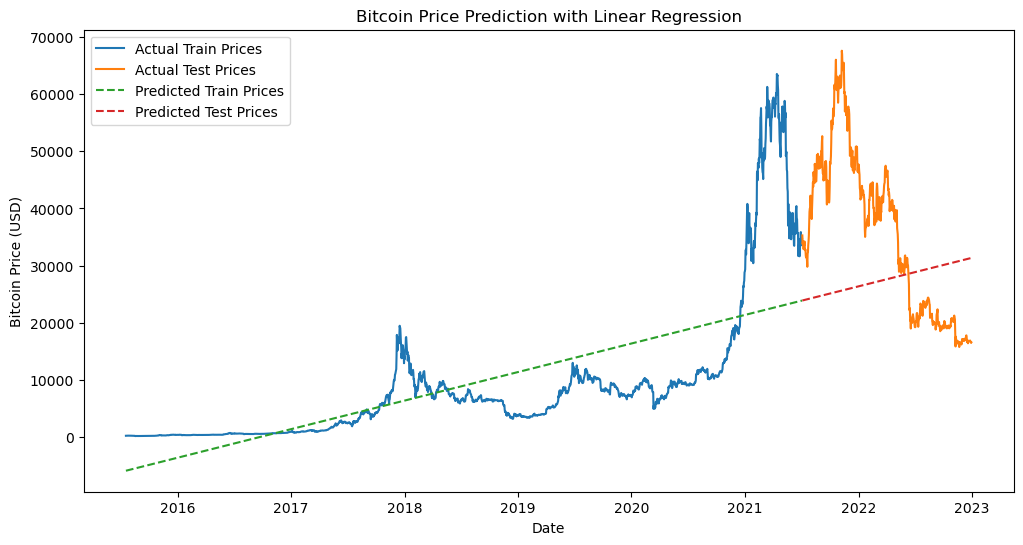

In [10]:
# Step 10: Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[:len(train_set)], y_train, label='Actual Train Prices')
plt.plot(btc_data.index[len(train_set):], y_test, label='Actual Test Prices')
plt.plot(btc_data.index[:len(train_set)], train_predictions, label='Predicted Train Prices', linestyle='--')
plt.plot(btc_data.index[len(train_set):], test_predictions, label='Predicted Test Prices', linestyle='--')
plt.legend()
plt.title('Bitcoin Price Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.show()
